<a href="https://colab.research.google.com/github/engineerjkk/DeepLearning_from_Scratch/blob/main/StepbyStep_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

In [2]:

from tensorflow.keras import datasets

In [3]:
mnist=datasets.mnist

In [4]:

(train_x, train_y), (test_x, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
train_x.shape

(60000, 28, 28)

In [7]:
image = train_x[0]
image.shape

(28, 28)

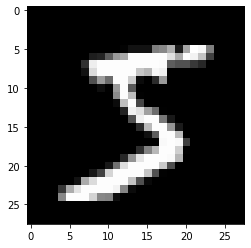

In [8]:
plt.imshow(image, 'gray')
plt.show()

In [9]:
import struct
import numpy as np
from matplotlib import pyplot
import matplotlib as mpl

In [10]:

def show(image):
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

def ascii_show(image):
    for y in image:
        row = ""
        for x in y:
            row += '{:02X}'.format(x)+' '
        print(row)

In [11]:
pixel = train_x[0]
label = train_y[0]

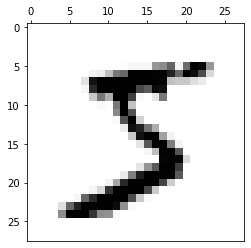

In [12]:
show(pixel)

In [13]:
ascii_show(pixel)

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 03 12 12 12 7E 88 AF 1A A6 FF F7 7F 00 00 00 00 
00 00 00 00 00 00 00 00 1E 24 5E 9A AA FD FD FD FD FD E1 AC FD F2 C3 40 00 00 00 00 
00 00 00 00 00 00 00 31 EE FD FD FD FD FD FD FD FD FB 5D 52 52 38 27 00 00 00 00 00 
00 00 00 00 00 00 00 12 DB FD FD FD FD FD C6 B6 F7 F1 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 50 9C 6B FD FD CD 0B 00 2B 9A 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 0E 01 9A FD 5A 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 8B FD BE 02 00 00 00 00 00 00 00

# 3. Export the average value of first ten images in train-images.idx3-ubyte. The size will be 28x28。

In [14]:
pixels = np.zeros([28,28])
for i in range(10):
    pixel = train_x[0]
    label = train_y[0]
    pixels += pixel
pixels = pixels/10

In [15]:
ascii_show(pixels.astype(np.uint8))

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 03 12 12 12 7E 88 AF 1A A6 FF F7 7F 00 00 00 00 
00 00 00 00 00 00 00 00 1E 24 5E 9A AA FD FD FD FD FD E1 AC FD F2 C3 40 00 00 00 00 
00 00 00 00 00 00 00 31 EE FD FD FD FD FD FD FD FD FB 5D 52 52 38 27 00 00 00 00 00 
00 00 00 00 00 00 00 12 DB FD FD FD FD FD C6 B6 F7 F1 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 50 9C 6B FD FD CD 0B 00 2B 9A 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 0E 01 9A FD 5A 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 8B FD BE 02 00 00 00 00 00 00 00

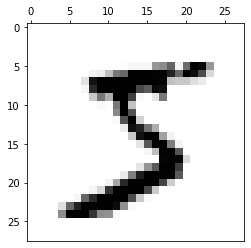

In [16]:
show(pixels)

# 4. Export the average of first ten labels in train-labels.idx1-ubyte.

In [17]:
labels = []
for i in range(10):
    pixel = train_x[0]
    label = train_y[0]
    labels.append(label)
print(labels, 'Mean:{:.2f}'.format(np.mean(labels)))

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Mean:5.00


# 5. Export the first image in train-images.idx3-ubyte. The size will be 32x32. Add zero padding.

In [18]:
def padding(img):
    result = np.zeros([32,32])
    for i in range(28):
        for j in range(28):
            result[i+2,j+2] = img[i,j]
    return result

In [19]:
pixel = train_x[0]
label = train_y[0]
img = padding(pixel)
ascii_show(img.astype(np.uint8))

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 03 12 12 12 7E 88 AF 1A A6 FF F7 7F 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 1E 24 5E 9A AA FD FD FD FD FD E1 AC FD F2 C3 40 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 31 EE FD FD FD FD FD FD FD FD FB 5D 52 52 38 27 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 12 

# 6. Save the image in the problem 2 as BMP file. (Skip)

# Edge Detection

# 1. Increase the size of first five picture into 30x30. Use Gx and Gy Matrix to generate 10 pictures

In [20]:
# Pad out the original image.
def padding_30(img):
    result = np.zeros([30,30])
    for i in range(28):
        for j in range(28):
            result[i+1,j+1] = img[i,j]
    return result

In [21]:

Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [22]:
# Filter the image by Gx and Gy
def Gx_Fc(number):
    New_img_list = []
    for i in range(number):
        New_img = np.zeros([28,28])
        pixel = train_x[0]
        label = train_y[0]
        img = padding_30(pixel)
        for j in range(pixel.shape[0]):
            for k in range(pixel.shape[1]):
                New_img[j,k] = sum(sum(np.multiply(img[j:j+3,k:k+3],Gx)))/(3*3)
        New_img_list.append(New_img)
    show_list(New_img_list)

def Gy_Fc(number):
    New_img_list = []
    for i in range(number):
        New_img = np.zeros([28,28])
        pixel = train_x[0]
        label = train_y[0]
        img = padding_30(pixel)
        for j in range(pixel.shape[0]):
            for k in range(pixel.shape[1]):
                New_img[j,k] = sum(sum(np.multiply(img[j:j+3,k:k+3],Gy)))/(3*3)
        New_img_list.append(New_img)
    show_list(New_img_list)
        
def show_list(image):
    fig = pyplot.figure()
    L = len(image)
    for i in range(L):
        ax = fig.add_subplot(1,L,i+1)
        imgplot = ax.imshow(image[i], cmap=mpl.cm.Greys)
    pyplot.show()

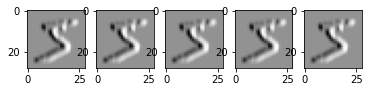

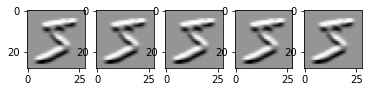

In [23]:
Gx_Fc(5)
Gy_Fc(5)

# 2. Increase the size of the first image in the dataset to 32x32, 34x34, 36x36. Then, use 5x5, 7x7 and 9x9 filter to modify it.

In [24]:

# To generate 32x32, 34x34, 36x36 image
def padding_32_34_36(img):
    result1 = np.zeros([32,32])
    result2 = np.zeros([34,34])
    result3 = np.zeros([36,36])
    
    for i in range(28):
        for j in range(28):
            p = img[i,j]
            result1[i+2,j+2] = p
            result2[i+3,j+3] = p
            result3[i+4,j+4] = p
    return result1, result2, result3

In [25]:

# To make filter
def make_filter(size):
    Filter = np.zeros([size,size])
    half = int(size/2)
    for j in range(half):
        for i in range(half+1):
            Filter[i,j] = half+i-j
    count = 1
    for i in range(half+1,size):
        for j in range(half):
            Filter[i,j] = Filter[i-2*count,j]
        count+=1
    count = 1  
    for j in range(half+1,size):
        for i in range(size):
            Filter[i,j] = -Filter[i,j-2*count]
        count+=1
    return Filter

In [26]:

# Use filter on image
def Filter_Fc(img,filters):
    New_img = np.zeros([28,28])
    subsize = filters.shape[0]
    for j in range(New_img.shape[0]):
        for k in range(New_img.shape[1]):
            New_img[j,k] = sum(sum(np.multiply(img[j:j+subsize,k:k+subsize],filters)))/(subsize*subsize)
    show(New_img)
    ascii_show(New_img.astype(np.uint8))

----------5x5 filter on 32x32----------


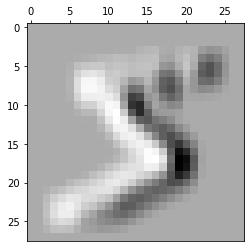

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 FF FE FE F7 F3 EF FE 01 F7 F2 F5 12 1E 18 0A 00 00 
00 00 00 00 00 00 FE FC F8 F2 F0 EA EC F2 EB EA E6 02 07 F3 E5 F9 39 4D 39 14 00 00 
00 00 00 00 00 FD E8 DC D6 D8 E5 DD E0 E9 E3 E1 E9 18 21 FE DD 00 5F 79 56 1C 00 00 
00 00 00 00 00 F9 C9 A9 A1 B2 D7 D2 DC EB E8 E9 09 45 4D 1C EA 12 6A 7A 53 19 00 00 
00 00 00 00 00 F6 AF 75 71 92 CE D5 F4 16 0B F3 19 63 71 3F FB 18 52 58 3B 11 00 00 
00 00 00 00 00 F8 AF 6E 6A 81 B3 CA 0A 4E 44 07 23 67 7B 51 08 18 29 25 16 05 00 00 
00 00 00 00 00 FA C3 8F 8E 87 91 B1 1E 8E 82 1C 0F 42 5E 45 05 08 08 06 03 00 00 00 
00 00 00 00 00 FF E5 C8 C8 A1 6F 7E 08 9B A7 3E 08 1B 2E 25 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 FA EF F0 C1 72 5A D1 6F A6 68 1B 12 12 0C 00 00

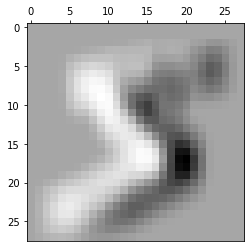

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 FF FF FE F8 F3 EF F7 F6 F3 F4 F9 04 0A 19 1C 14 07 00 
00 00 00 00 00 FF FD F9 F2 EE E7 E6 E7 E5 E4 E3 F8 F6 F2 F3 FF 18 2A 44 41 2A 0E 00 
00 00 00 00 FD ED E2 D7 CF CE CF D9 DD DB DC E4 04 08 05 04 0D 29 46 68 5D 39 12 00 
00 00 00 00 FB D9 BC A6 9C A3 B0 CF D8 D5 D5 ED 1E 28 29 21 20 36 5D 87 76 47 16 00 
00 00 00 00 FA C9 99 76 61 6C 87 C5 E1 E7 EB 0C 3E 47 4C 42 3E 42 67 8B 75 45 14 00 
00 00 00 00 F9 BD 80 54 35 3F 6B C5 F7 0A 15 35 57 62 6A 5D 4F 3F 59 73 60 39 10 00 
00 00 00 00 F9 BD 7D 50 24 1E 49 BB 0A 35 4B 64 6B 67 72 66 54 33 42 54 47 2C 0D 00 
00 00 00 00 FB C7 8E 6A 36 13 27 A3 12 61 89 9C 7D 5E 6A 63 4F 21 26 29 1F 11 03 00 
00 00 00 00 FC D5 AB 97 65 2E 23 8B 01 64 A4 BB 8E 5A 59 4F 35 09 09 08 05 02 00 00 
00 00 00 00 FF EC D5 CB 9E 57 2A 65 C9 30 8D B8 9A 60 53 43 23 01

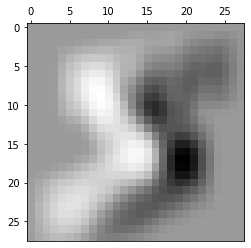

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 FF FF FE F9 F4 F0 F5 F3 EF ED F4 01 09 0F 10 19 18 10 06 
00 00 00 00 FF FE FA F4 EF E8 E4 E3 DF DD DE EC ED EC EC FB 13 23 2F 33 3E 35 21 0B 
00 00 00 FE F1 E6 DB D1 CB C5 C5 CE D3 D2 DD F5 FA FE 00 12 2D 3F 4A 4F 58 47 2B 0D 
00 00 00 FD E2 CA B4 A2 9B 97 A2 BA CB CB E4 07 15 1D 20 31 4C 5A 5E 66 6D 56 33 0F 
00 00 00 FC D7 B2 92 71 62 63 7F AB CB CE F1 22 30 38 35 46 64 74 72 7C 83 65 3B 12 
00 00 00 FB CF A0 78 45 29 2E 59 97 CB DB 0D 4A 58 5A 52 60 7B 85 7A 81 84 65 3A 11 
00 00 00 FA C8 91 63 20 F6 FE 3D 8F DC FA 38 7B 87 7F 6C 74 88 86 6D 71 73 58 33 0E 
00 00 00 FA C8 90 61 19 DE DB 22 84 E8 18 61 A6 B0 9B 76 78 86 7C 59 5B 5E 49 2B 0C 
00 00 00 FB CE 9A 72 2A E4 CD 09 6A DE 29 7D C5 CD B0 7C 77 7E 6B 45 45 49 3A 22 0A 
00 00 00 FC D6 AA 8B 49 FE D7 FD 4D C0 21 89 D8 EA D0 9C 8A 7A 56 29 26 24 1A 0E 03 
00 00 00 FD DF BD A9 76 2E FF 15 4C A6 02 6E C6 E9 D6 A5 92 77 48

In [27]:
pixel = train_x[0]
label = train_y[0]
img32, img34, img36 = padding_32_34_36(pixel)
filter5 = make_filter(5)
filter7 = make_filter(7)
filter9 = make_filter(9)
print('----------5x5 filter on 32x32----------')
Filter_Fc(img32,filter5)
print('----------7x7 filter on 34x34----------')
Filter_Fc(img34,filter7)
print('----------9x9 filter on 36x36----------')
Filter_Fc(img36,filter9)

# 3. Explain why Gx can detect the edge¶
# Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
## The digits in middle column of Gx are all zero. The numbers besides zero are inverse number. This makes filters seperate the pixel on the edge more easily. The object can be more well

# Activation Function

In [29]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def D_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Sigmoid

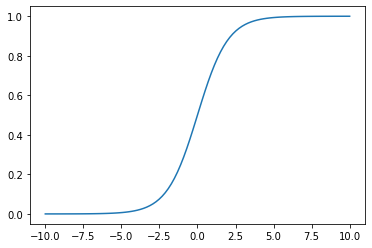

In [30]:

x = np.linspace(-10,10,100)
y = sigmoid(x)
plt.plot(x,y)
plt.show()

# Derivative Sigmoid

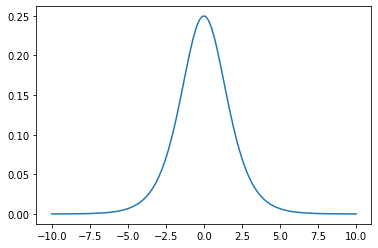

In [31]:
x = np.linspace(-10,10,100)
y = D_sigmoid(x)
plt.plot(x,y)
plt.show()

In [32]:
def tanh(x):
    return (np.exp(x/2)-np.exp(-x/2))/(np.exp(x/2)+np.exp(-x/2))

def D_tanh(x):
    return 1-tanh(x)**2

# tanh

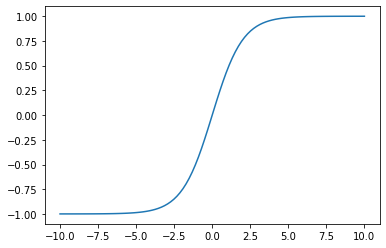

In [33]:

x = np.linspace(-10,10,100)
y = []
for dig in x:
    y.append(tanh(dig))
plt.plot(x,np.reshape(y,(100,)))
plt.show()

# Derivative tanh

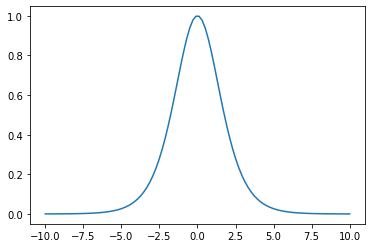

In [34]:
x = np.linspace(-10,10,100)
y = []
for dig in x:
    y.append(D_tanh(dig))
plt.plot(x,np.reshape(y,(100,)))
plt.show()

In [35]:
def ReLU(x):
    return max(0,x)

def D_ReLU(x):
    return 1 if x >= 0 else 0

ReLU

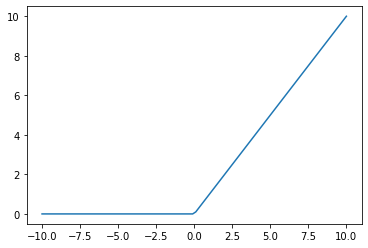

In [36]:
x = np.linspace(-10,10,100)
y = []
for dig in x:
    y.append(ReLU(dig))
plt.plot(x,np.reshape(y,(100,)))
plt.show()

# Derivative ReLU

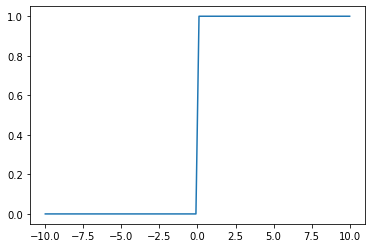

In [37]:
x = np.linspace(-10,10,100)
y = []
for dig in x:
    y.append(D_ReLU(dig))
plt.plot(x,np.reshape(y,(100,)))
plt.show()

In [38]:
def ELU(x,a):
    return x if x > 0 else a*(np.exp(x)-1)

def D_ELU(x,a):
    return 1 if x >= 0 else ELU(x,a) + a

# ELU

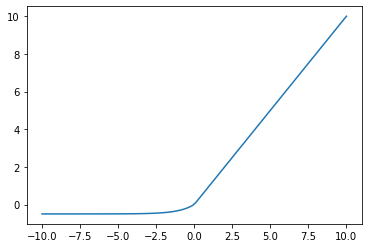

In [39]:
x = np.linspace(-10,10,100)
y = []
for dig in x:
    y.append(ELU(dig,0.5))
plt.plot(x,np.reshape(y,(100,)))
plt.show()

# Derivative ELU

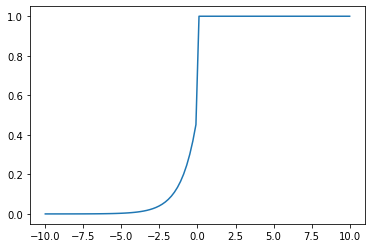

In [40]:

x = np.linspace(-10,10,100)
y = []
for dig in x:
    y.append(D_ELU(dig,0.5))
plt.plot(x,np.reshape(y,(100,)))
plt.show()

In [41]:
def Leaky_ReLU(x,a):
    return x if x > 0 else a*x

def D_Leaky_ReLU(x,a):
    return 1 if x >= 0 else a

# Leaky ReLU

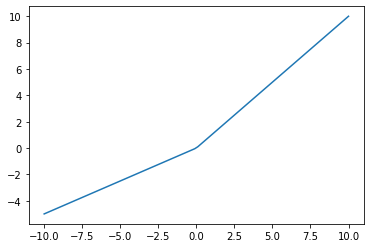

In [42]:
x = np.linspace(-10,10,100)
y = []
for dig in x:
    y.append(Leaky_ReLU(dig,0.5))
plt.plot(x,np.reshape(y,(100,)))
plt.show()

# Derivative Leaky ReLU

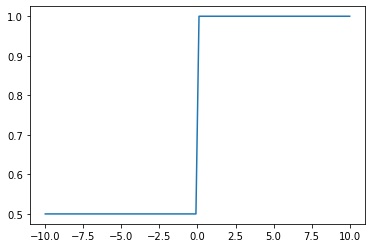

In [43]:
x = np.linspace(-10,10,100)
y = []
for dig in x:
    y.append(D_Leaky_ReLU(dig,0.5))
plt.plot(x,np.reshape(y,(100,)))
plt.show()

In [48]:
print(pixel.shape[0]/2)

14.0


Max Pooling


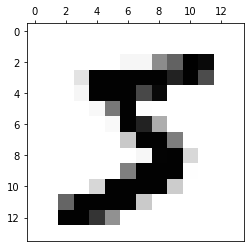

Average Pooling


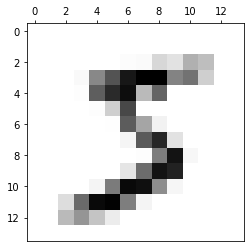

Max Pooling


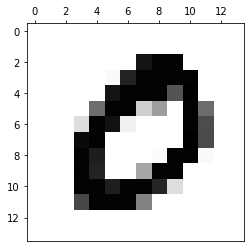

Average Pooling


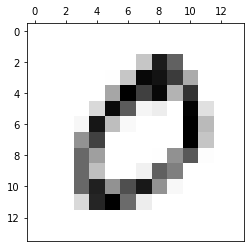

Max Pooling


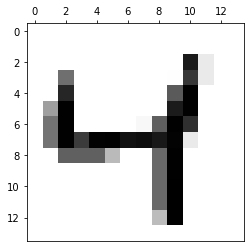

Average Pooling


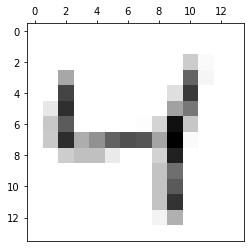

Max Pooling


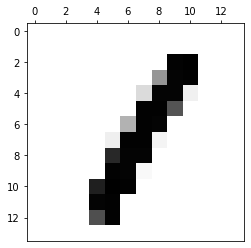

Average Pooling


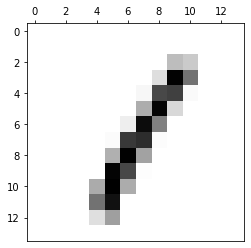

Max Pooling


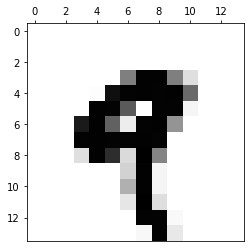

Average Pooling


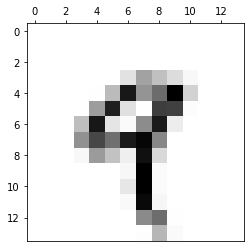

In [51]:
for i in range(5):
    pixel = train_x[i]
    label = train_y[i]
    pool2x2 = np.zeros([int(pixel.shape[0]/2),int(pixel.shape[0]/2)])
    for i in range(0,pixel.shape[0],2):
        for j in range(0,pixel.shape[0],2):
            M = np.max(pixel[i:i+2,j:j+2])
            pool2x2[int((i/2)),int((j/2))] = M
    print('Max Pooling')
    show(pool2x2)
    
    for i in range(0,pixel.shape[0],2):
        for j in range(0,pixel.shape[0],2):
            M = np.mean(pixel[i:i+2,j:j+2])
            pool2x2[int((i/2)),int((j/2))] = M
    print('Average Pooling')
    show(pool2x2)